In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
display(HTML("<style>.container { font-weight: bold !important;}</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
# plt.rcParams['figure.figsize'] = [10, 6]

# 퀴즈 

피마 인디언 당뇨병(Pima Indian Diabets) 데이터 세트를 이용해 당뇨병 여부를 판단하는 머신러닝 예측 모델을 수립하고 
테스트 하여라. 

<!-- 아래그림 확인 -->
<img src="https://thebook.io/img/080228/137.jpg">
<br>
<img src="http://health.chosun.com/site/data/img_dir/2005/09/29/c2005092956311_01.jpg">

* Pregnancies: 임신 횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압(mm Hg)
* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* Insulin: 혈청 인슐린(mu U/ml)
* BMI: 체질량지수(체중(kg)/(키(m))^2)
* DiabetesPedigreeFunction: 당뇨 내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정 값(0 또는 1)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import cross_val_score 
# from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import classification_report



In [4]:
# 1) diabetes.csv 파일을 이용하여 데이타프레임을 생성하여라 

In [48]:
ls data\d*.csv

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2819-FF50

 C:\workspace211123\data 디렉터리

2019-09-19  오후 10:44            23,873 diabetes.csv
               1개 파일              23,873 바이트
               0개 디렉터리  66,076,651,520 바이트 남음


In [58]:
df_diabetes = pd.read_csv('data/diabetes.csv')
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
df_diabetes.shape

(768, 9)

In [60]:
# Outcome: 클래스 결정 값(0 또는 1)
# 1 => 당뇨병 , 0 => 정상 
df_diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [61]:
# 2) 결측값이 있는지 확인하여라. 
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [62]:
df_diabetes.isnull().sum().sum()

0

In [63]:
# 결측 및 데이타형 확인 
df_diabetes.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [64]:
# 3) 각 피처별 최소값이 0으로 측정되는 데이타값을 평균값으로 변경하여라. 
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

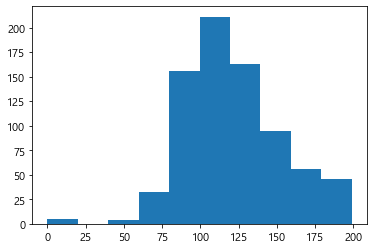

In [65]:
# 정상적이지 않은 값들이 있다. - 예) Glucose	 포도당 수치 , BloodPressure , 
plt.hist(df_diabetes['Glucose'], bins=10)

In [66]:
# Min 값이 0인 피처명 리스트
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 건수
total_count = df_diabetes['Glucose'].count()

# 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = df_diabetes[df_diabetes[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))


Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [67]:
# zero_features 에서 0인 값들을 평균 값으로 대체
df_diabetes[zero_features]=df_diabetes[zero_features].replace(0, df_diabetes[zero_features].mean())

In [68]:
# 다시 확인 
# 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = df_diabetes[df_diabetes[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))


Glucose 0 건수는 0, 퍼센트는 0.00 %
BloodPressure 0 건수는 0, 퍼센트는 0.00 %
SkinThickness 0 건수는 0, 퍼센트는 0.00 %
Insulin 0 건수는 0, 퍼센트는 0.00 %
BMI 0 건수는 0, 퍼센트는 0.00 %


(array([  4.,  19.,  87., 149., 166., 125.,  88.,  54.,  44.,  32.]),
 array([ 44. ,  59.5,  75. ,  90.5, 106. , 121.5, 137. , 152.5, 168. ,
        183.5, 199. ]),
 <BarContainer object of 10 artists>)

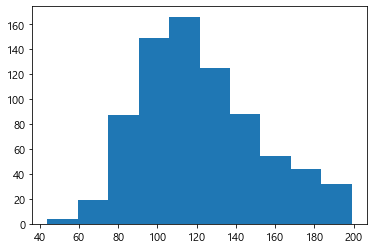

In [69]:
# 다시 시각화해서 확인 
plt.hist(df_diabetes['Glucose'], bins=10)

In [70]:
# min 값이 0이 아님 확인 
df_diabetes['Glucose'].describe()

count    768.000000
mean     121.681605
std       30.436016
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [71]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
# 4) StandardScaler()를 이용하여 스케일링하여라.

In [19]:
# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용

In [72]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [74]:
# X 지정 
# X = df_diabetes.loc[:, :'Age']

In [76]:
X = df_diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
scaler = StandardScaler( )
scaler.fit(X)
temp = scaler.fit_transform(X)
print(type(temp))

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

<class 'numpy.ndarray'>


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496


In [77]:
# 5) 학습 데이타셋과 테스트 데이타셋으로 분리시키고 모델을 생성한 후 
#    머신러닝 예측 모델을 수립하고 학습하여라 

y = df_diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                      random_state = 156, stratify=y)

model_dt = DecisionTreeClassifier(random_state=11)
model_dt.fit(X_train , y_train)

DecisionTreeClassifier(random_state=11)

[0.04207819 0.32186146 0.07676339 0.03858707 0.09504626 0.16839489
 0.17662197 0.08064677]


<AxesSubplot:>

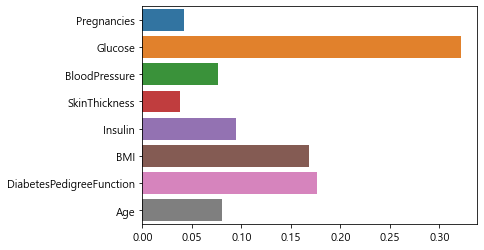

In [78]:
# 10) 가장 중요도가 높은 피처 2개는 무엇인가?
print(model_dt.feature_importances_)

# 피처 중요도 시각화 
sns.barplot(x=model_dt.feature_importances_ , y=X.columns)

In [79]:
# 6) 오차행렬, 재현율, 정밀도, 정확도, F1 Score 등의 평가지표를 출력하여라 

from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error

confusion_matrix(y_test, model_dt.predict(X_test))

array([[83, 17],
       [23, 31]], dtype=int64)

Text(40.0, 0.5, 'Actual')

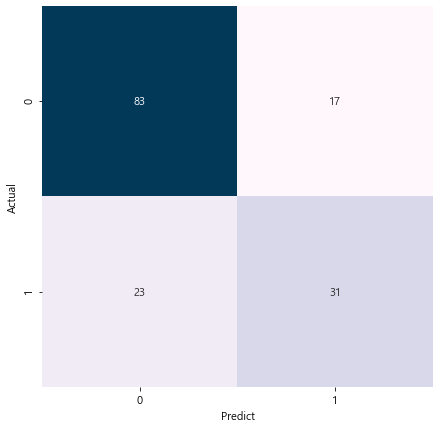

In [80]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test, model_dt.predict(X_test)), \
            annot=True, cmap='PuBu', cbar=False);
plt.xlabel('Predict')
plt.ylabel('Actual')

In [81]:
print(classification_report(y_test, model_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       100
           1       0.65      0.57      0.61        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154



In [29]:
# 7) 결정트리 그래프 시각화 

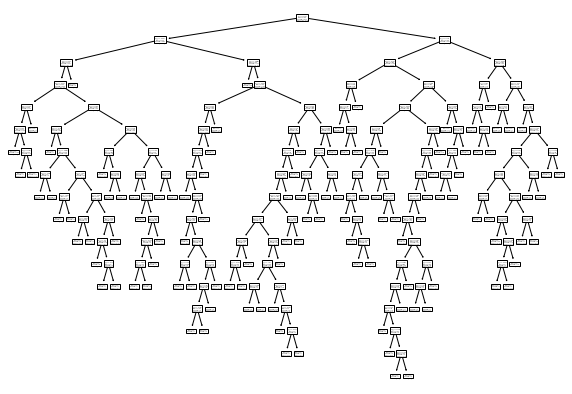

In [30]:
from sklearn.tree import plot_tree

# 트리 시각화 
plt.figure(figsize=(10,7))
# 트리 생성
plot_tree(model_dt)

plt.show()

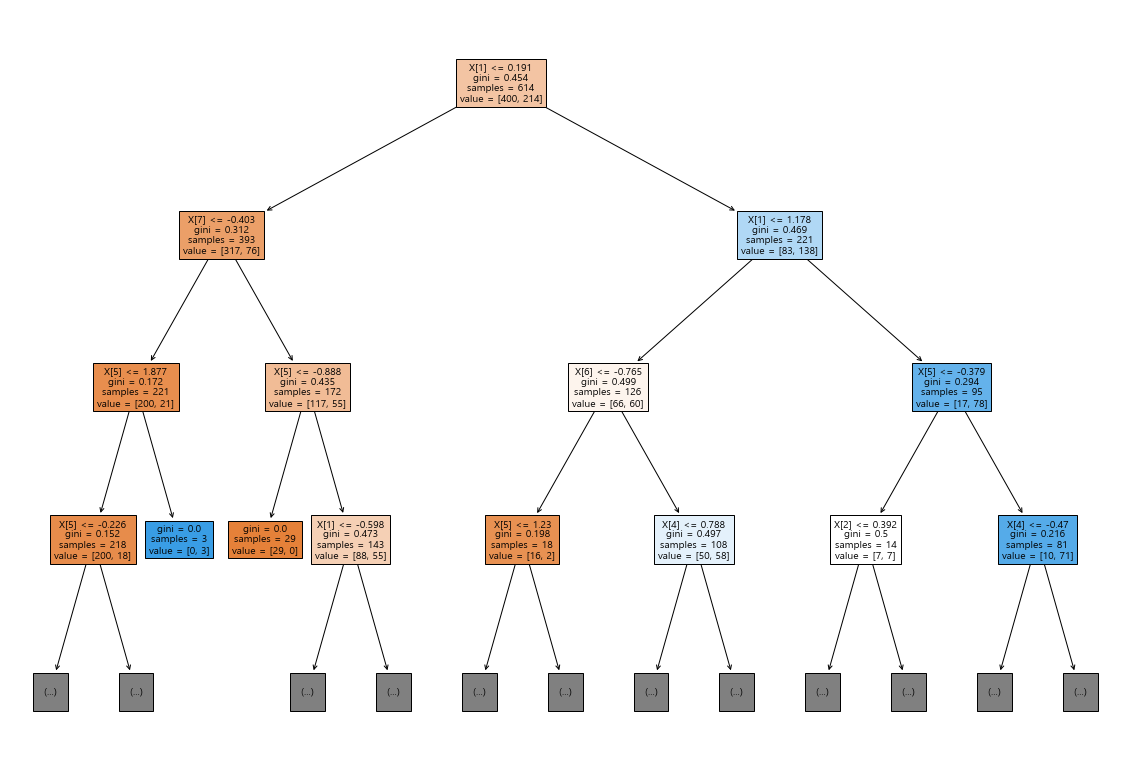

In [31]:
plt.figure(figsize=(20,14))

# plot_tree(model_dt, max_depth=3, filled=True, feature_names=X.columns, fontsize=10)
plot_tree(model_dt, max_depth=3, filled=True,  fontsize=10)
plt.show()

In [32]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [33]:
# 8) 아래의 소스를 참조하여 그리드서치를 적용시켜 최적의 하이퍼파라미터 예측 모델을 생성하여라. 

model_dt = DecisionTreeClassifier(random_state=11)

parameters = {'max_depth':[2,3,5,10] }

grid_cv = GridSearchCV(model_dt , param_grid=parameters , scoring='accuracy' , cv=5, verbose=1)

In [34]:
grid_cv.fit(X_train , y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10]}, scoring='accuracy',
             verbose=1)

In [35]:
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

GridSearchCV 최고 평균 정확도 수치:0.7475
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3}


In [36]:
# 9) 최적의 하이퍼파라미터로 모델을 생성하고 다시 학습시킨 후 평가지표를 확인하여라 

In [37]:
# 최적 하이퍼 파라미터: {'max_depth': 3} 로 추정되는 모델 다시 생성 
model_dt2 = DecisionTreeClassifier(max_depth=3, random_state=11)
model_dt2.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=3, random_state=11)

In [40]:
print("f1_score:", f1_score(y_test , model_dt2.predict(X_test)))
print()
print(classification_report(y_test, model_dt2.predict(X_test)))

f1_score: 0.5384615384615384

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       100
           1       0.56      0.52      0.54        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.68      0.69      0.69       154



Text(40.0, 0.5, 'Actual')

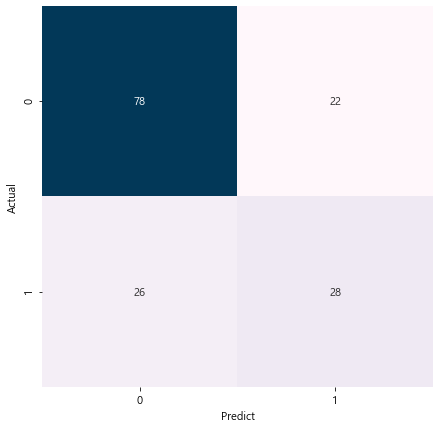

In [41]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test, model_dt2.predict(X_test)), \
            annot=True, cmap='PuBu', cbar=False);
plt.xlabel('Predict')
plt.ylabel('Actual')

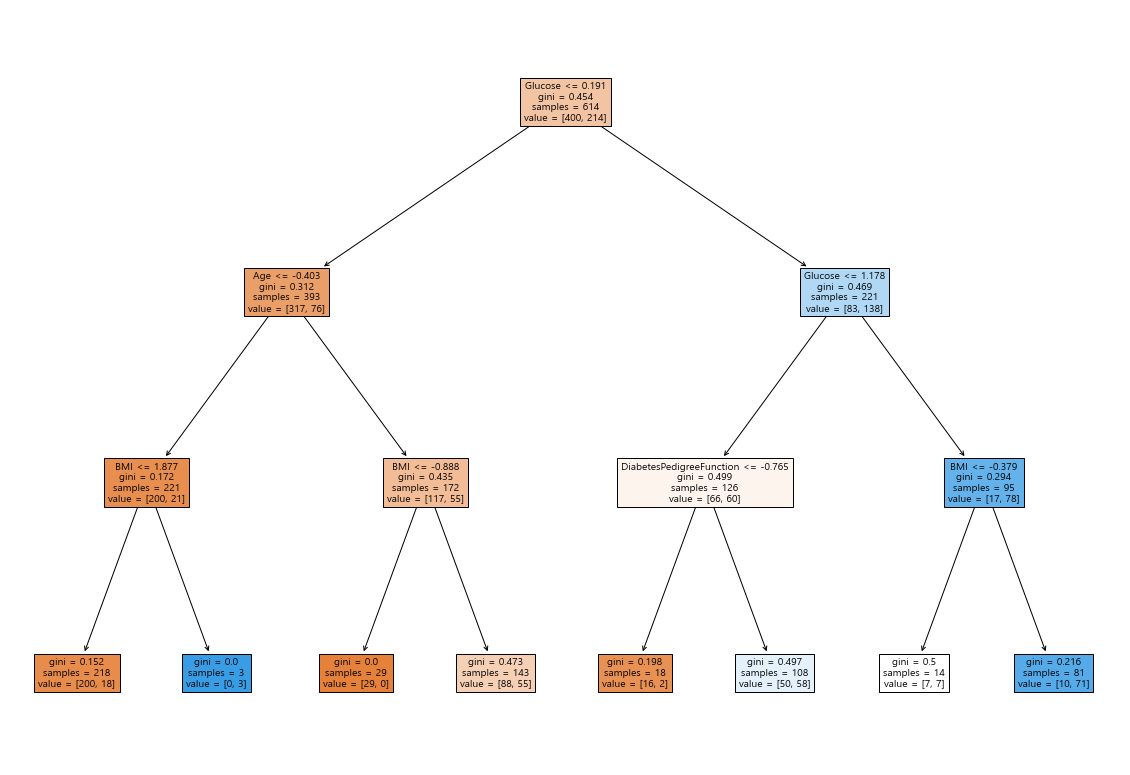

In [42]:
plt.figure(figsize=(20,14))
plot_tree(model_dt2, max_depth=3, filled=True, feature_names=X.columns, fontsize=10)
plt.show()

In [43]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

[0.         0.67951197 0.         0.         0.         0.16092341
 0.05811913 0.10144549]

Pregnancies : 0.000
Glucose : 0.680
BloodPressure : 0.000
SkinThickness : 0.000
Insulin : 0.000
BMI : 0.161
DiabetesPedigreeFunction : 0.058
Age : 0.101



<AxesSubplot:>

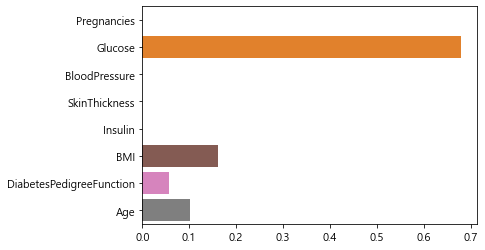

In [44]:
# 10) 가장 중요도가 높은 피처 2개는 무엇인가?
print(model_dt2.feature_importances_)
print()

for name, value in zip(X.columns , model_dt2.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
print()

# 피처 중요도 시각화 
sns.barplot(x=model_dt2.feature_importances_ , y=X.columns)

### 다른 모델 적용 

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

y = df_diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                      random_state = 156, stratify=y)

# model = DecisionTreeClassifier(random_state=11, max_depth=3)
model = LogisticRegression()
# model = RandomForestClassifier(random_state=11)
# model = XGBClassifier() 

model.fit(X_train , y_train)

print()
print(classification_report(y_test, model.predict(X_test)))



              precision    recall  f1-score   support

           0       0.81      0.90      0.85       100
           1       0.77      0.61      0.68        54

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154

